<a href="https://colab.research.google.com/github/surya323-ma/EV-Vehicle-Charging-Demand-Prediction/blob/main/EV_Vehicle_Charging_Demand_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
df=pd.read_csv('Electric_Vehicle.csv')
print(df.columns)

df.head(10)
df.shape

Saving Electric_Vehicle.csv to Electric_Vehicle (1).csv
Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles'],
      dtype='object')


(20819, 10)

In [7]:
print(df.head())

                Date          County State Vehicle Primary Use  \
0  September 30 2022       Riverside    CA           Passenger   
1   December 31 2022  Prince William    VA           Passenger   
2    January 31 2020          Dakota    MN           Passenger   
3       June 30 2022           Ferry    WA               Truck   
4       July 31 2021         Douglas    CO           Passenger   

  Battery Electric Vehicles (BEVs) Plug-In Hybrid Electric Vehicles (PHEVs)  \
0                                7                                        0   
1                                1                                        2   
2                                0                                        1   
3                                0                                        0   
4                                0                                        1   

  Electric Vehicle (EV) Total Non-Electric Vehicle Total Total Vehicles  \
0                           7                        

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
print(df.isnull().sum())

Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

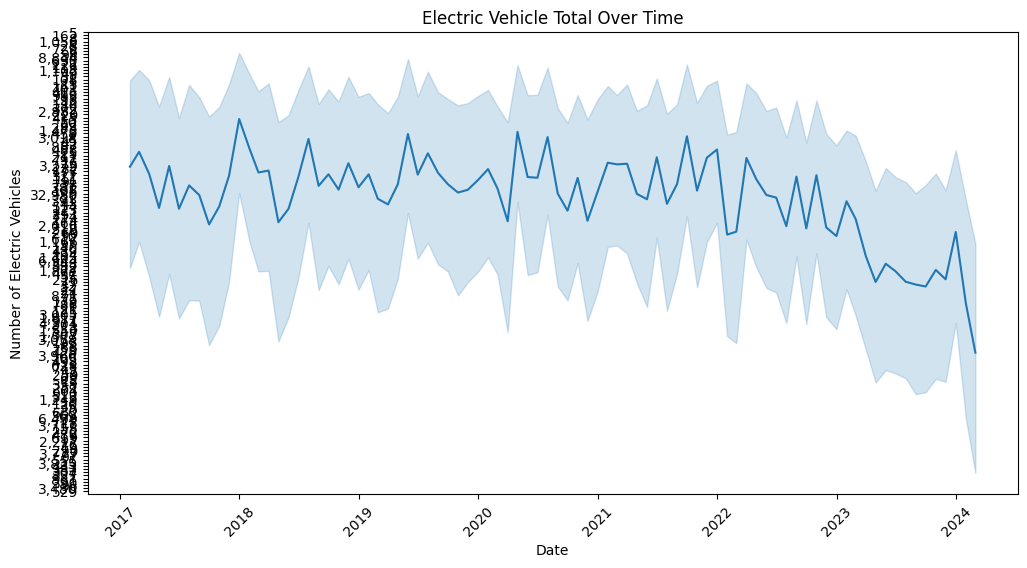

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Electric Vehicle (EV) Total')
plt.title('Electric Vehicle Total Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.show()

In [17]:
df['EV_Lag1'] = df['Electric Vehicle (EV) Total'].shift(1)
df['EV_Lag2'] = df['Electric Vehicle (EV) Total'].shift(2)

In [18]:
df.dropna(inplace=True)

In [20]:
X = df[['Year', 'Month', 'EV_Lag1', 'EV_Lag2']]
y = df['Electric Vehicle (EV) Total']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 562.318208656834
Mean Squared Error: 11316144.773175428
Root Mean Squared Error: 3363.9477958457423
R-squared: -0.13273659570648855


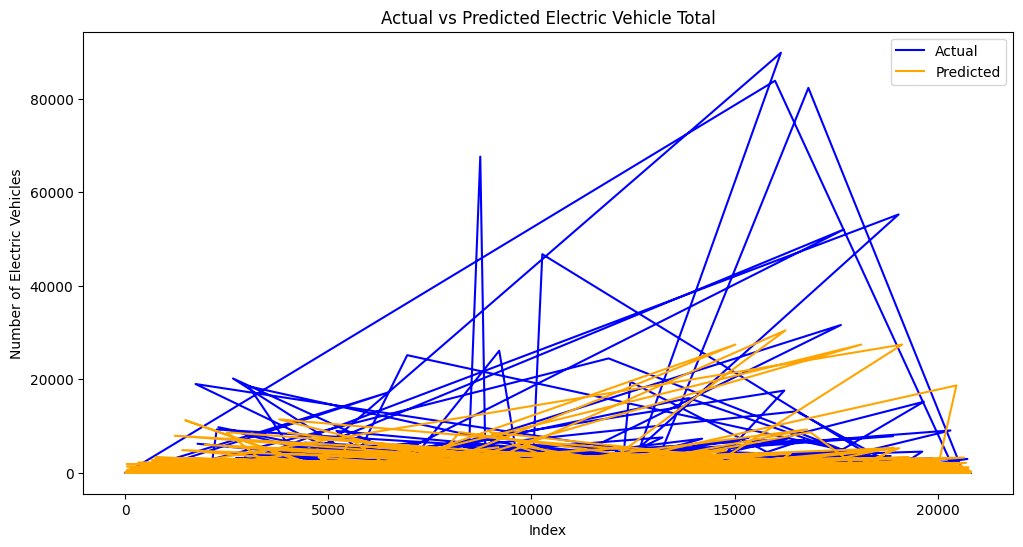

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='orange')
plt.title('Actual vs Predicted Electric Vehicle Total')
plt.xlabel('Index')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.show()

In [34]:
future_dates = pd.date_range(start='2024-03-01', end='2026-12-31', freq='M')
future_data = pd.DataFrame({'Date': future_dates})
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month

/tmp/ipython-input-34-4227837434.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-03-01', end='2026-12-31', freq='M')


In [47]:
last_ev_total = df['Electric Vehicle (EV) Total'].iloc[-1]
future_data['EV_Lag1'] = last_ev_total
future_data['EV_Lag2'] = last_ev_total

In [38]:
future_X = future_data[['Year', 'Month', 'EV_Lag1', 'EV_Lag2']]
future_predictions = model.predict(future_X)

In [39]:
future_data['Predicted_EVs'] = future_predictions


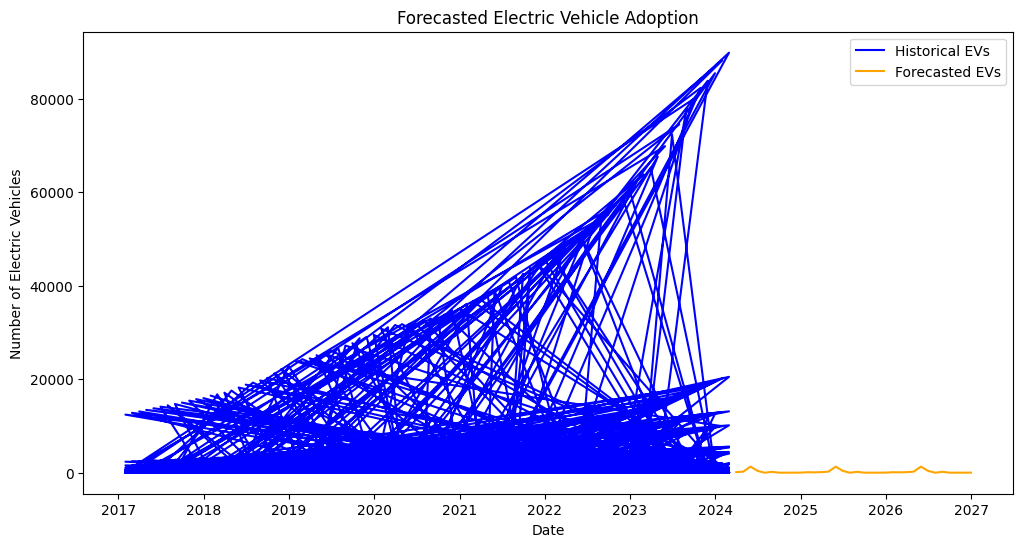

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Electric Vehicle (EV) Total'], label='Historical EVs', color='blue')
plt.plot(future_data['Date'], future_data['Predicted_EVs'], label='Forecasted EVs', color='orange')
plt.title('Forecasted Electric Vehicle Adoption')
plt.xlabel('Date')
plt.ylabel('Number of Electric Vehicles')
plt.legend()
plt.show()